# 2. Анализ данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [131]:
# загрузим ранее сохраненный очищенный и предобработанный датасет
df = pd.read_csv('data/data_1.csv')
df.head()

,status,street,baths,city,sqft,zipcode,beds,state,target,PoolPrivate,MLS,latitude,longitude,Year built,lotsize,school_rate,school_dist,PrType
0,active,240 Heather Ln,3.5,southern pines,2900.0,28387,4.0,NC,418000,0,611019,35.18,-79.40,2019,0.0,5.2,2.7,single family
1,for sale,12911 E Heroy Ave,3.0,spokane valley,1947.0,99216,3.0,WA,310000,0,201916904,47.69,-117.19,2019,5828.0,4.0,1.0,single family
2,for sale,2005 Westridge Rd,2.0,los angeles,3000.0,90049,3.0,CA,2895000,1,fr19221027,34.08,-118.49,1961,8626.0,6.7,1.2,single family
3,for sale,4311 Livingston Ave,8.0,dallas,6457.0,75205,5.0,TX,2395000,0,14191809,32.79,-96.76,2006,8220.0,9.0,0.1,single family
4,for sale,1524 Kiscoe St,0.0,palm bay,0.0,32908,0.0,FL,5000,0,861745,27.98,-80.66,no data,10019.0,4.7,3.0,land


In [132]:
# посмотрим основные параметры датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353505 entries, 0 to 353504
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   status       353505 non-null  object 
 1   street       353505 non-null  object 
 2   baths        353505 non-null  float64
 3   city         353489 non-null  object 
 4   sqft         353505 non-null  float64
 5   zipcode      353505 non-null  int64  
 6   beds         353505 non-null  float64
 7   state        353505 non-null  object 
 8   target       353505 non-null  int64  
 9   PoolPrivate  353505 non-null  int64  
 10  MLS          315444 non-null  object 
 11  latitude     353505 non-null  float64
 12  longitude    353505 non-null  float64
 13  Year built   353505 non-null  object 
 14  lotsize      353505 non-null  float64
 15  school_rate  353505 non-null  float64
 16  school_dist  353505 non-null  float64
 17  PrType       353505 non-null  object 
dtypes: float64(8), int64(3),

In [133]:
# исправим два типа данных:
# 1) почтовые индексы вернем в object
df['zipcode'] = df['zipcode'].astype(object)
# 2) год постройки перевести в datetime
df['Year built'] = df['Year built'].replace('1019','2020').\
                                    replace('1057','1987').\
                                    replace('1060','1960').\
                                    replace('1208','1908')
df['Year built'] = df['Year built'].replace('no data','1800')
df['Year built'] = df['Year built'].apply(lambda x: x+'-01-01')
df['Year built'] = pd.to_datetime(df['Year built'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353505 entries, 0 to 353504
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   status       353505 non-null  object        
 1   street       353505 non-null  object        
 2   baths        353505 non-null  float64       
 3   city         353489 non-null  object        
 4   sqft         353505 non-null  float64       
 5   zipcode      353505 non-null  object        
 6   beds         353505 non-null  float64       
 7   state        353505 non-null  object        
 8   target       353505 non-null  int64         
 9   PoolPrivate  353505 non-null  int64         
 10  MLS          315444 non-null  object        
 11  latitude     353505 non-null  float64       
 12  longitude    353505 non-null  float64       
 13  Year built   353505 non-null  datetime64[ns]
 14  lotsize      353505 non-null  float64       
 15  school_rate  353505 non-null  floa

In [134]:
small_df = df.loc[:1000]
small_df.shape

(1001, 18)

### Строим графики для визуальной оценки параметров.

##### Baths - ванные комнаты

Text(0, 0.5, 'frequency')

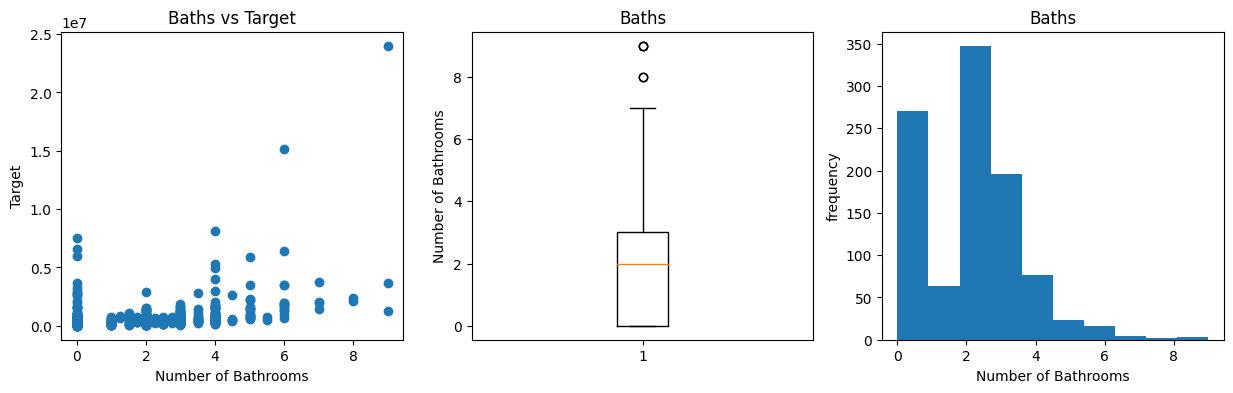

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=small_df['baths'], y=small_df['target'])
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Target')
ax1.set_title('Baths vs Target')

ax2.boxplot(small_df['baths'])
ax2.set_ylabel('Number of Bathrooms')
ax2.set_title('Baths')

ax3.hist(small_df['baths'])
ax3.set_title('Baths')
ax3.set_xlabel('Number of Bathrooms')
ax3.set_ylabel('frequency')

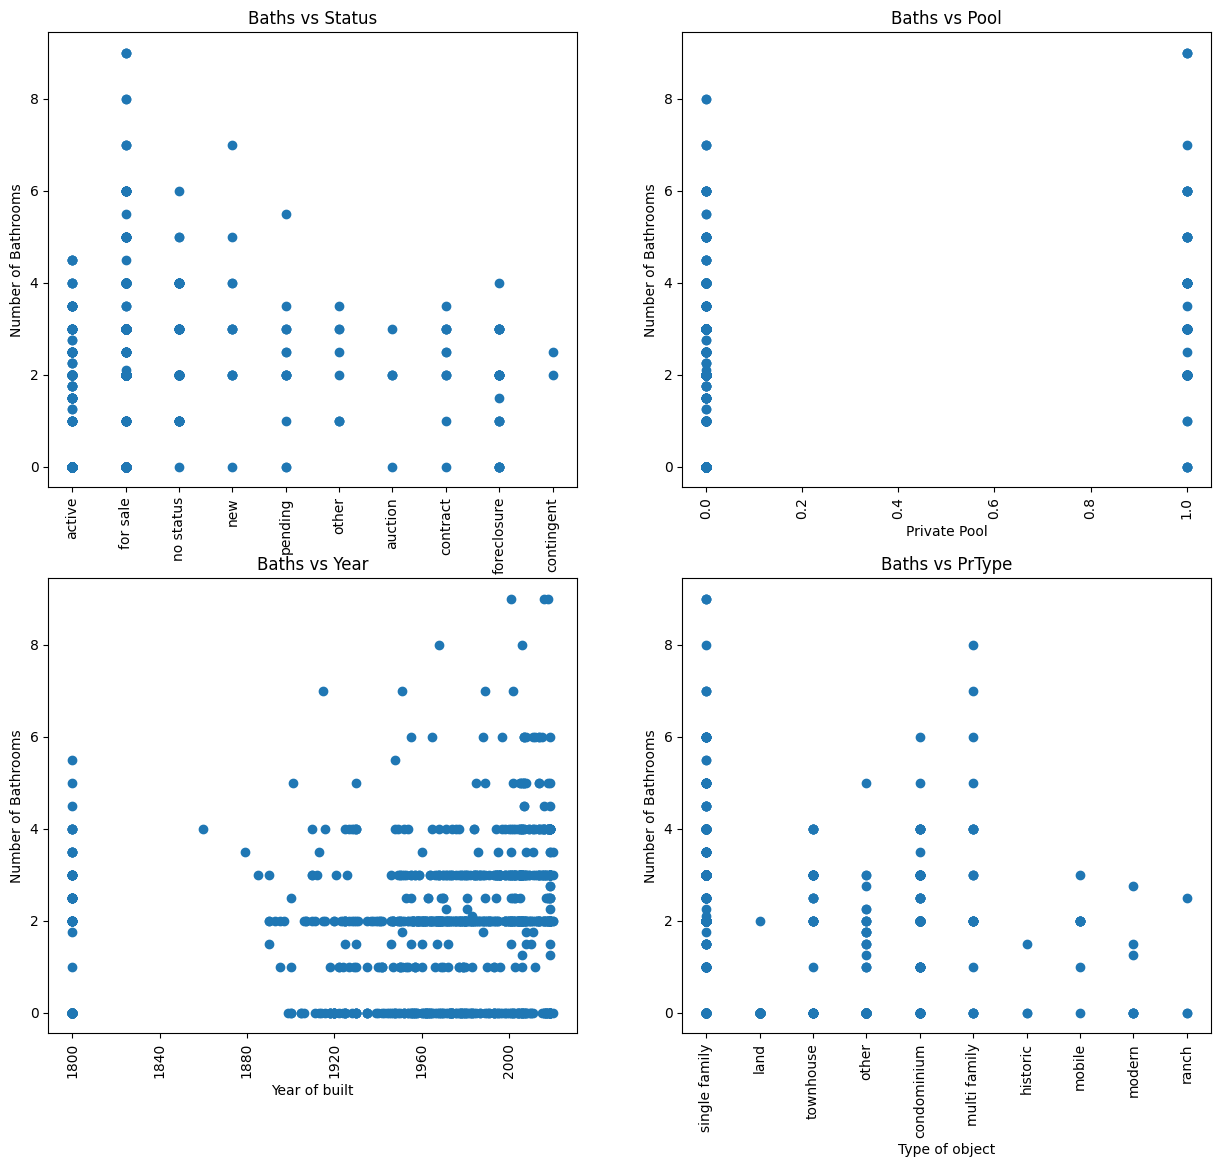

In [122]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=small_df['status'], y=small_df['baths'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Number of Bathrooms')
axes[0][0].set_title('Baths vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=small_df['PoolPrivate'], y=small_df['baths'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Number of Bathrooms')
axes[0][1].set_title('Baths vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=small_df['Year built'], y=small_df['baths'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Number of Bathrooms')
axes[1][0].set_title('Baths vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=small_df['PrType'], y=small_df['baths'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Number of Bathrooms')
axes[1][1].set_title('Baths vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

In [67]:
fig = px.scatter_geo(small_df, lat = 'latitude', lon = 'longitude', color = 'baths')
fig.update_layout(title = 'Baths on map', title_x = 0.5)
fig.show()

Выводы.  

_____________

##### SQFT - площадь объекта в футах

Text(0, 0.5, 'frequency')

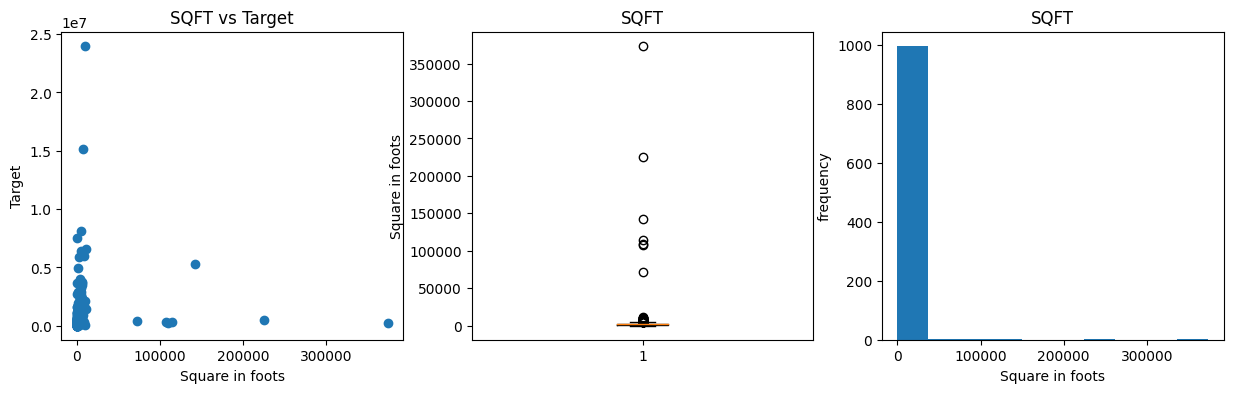

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=small_df['sqft'], y=small_df['target'])
ax1.set_xlabel('Square in foots')
ax1.set_ylabel('Target')
ax1.set_title('SQFT vs Target')

ax2.boxplot(small_df['sqft'])
ax2.set_ylabel('Square in foots')
ax2.set_title('SQFT')

ax3.hist(small_df['sqft'])
ax3.set_title('SQFT')
ax3.set_xlabel('Square in foots')
ax3.set_ylabel('frequency')

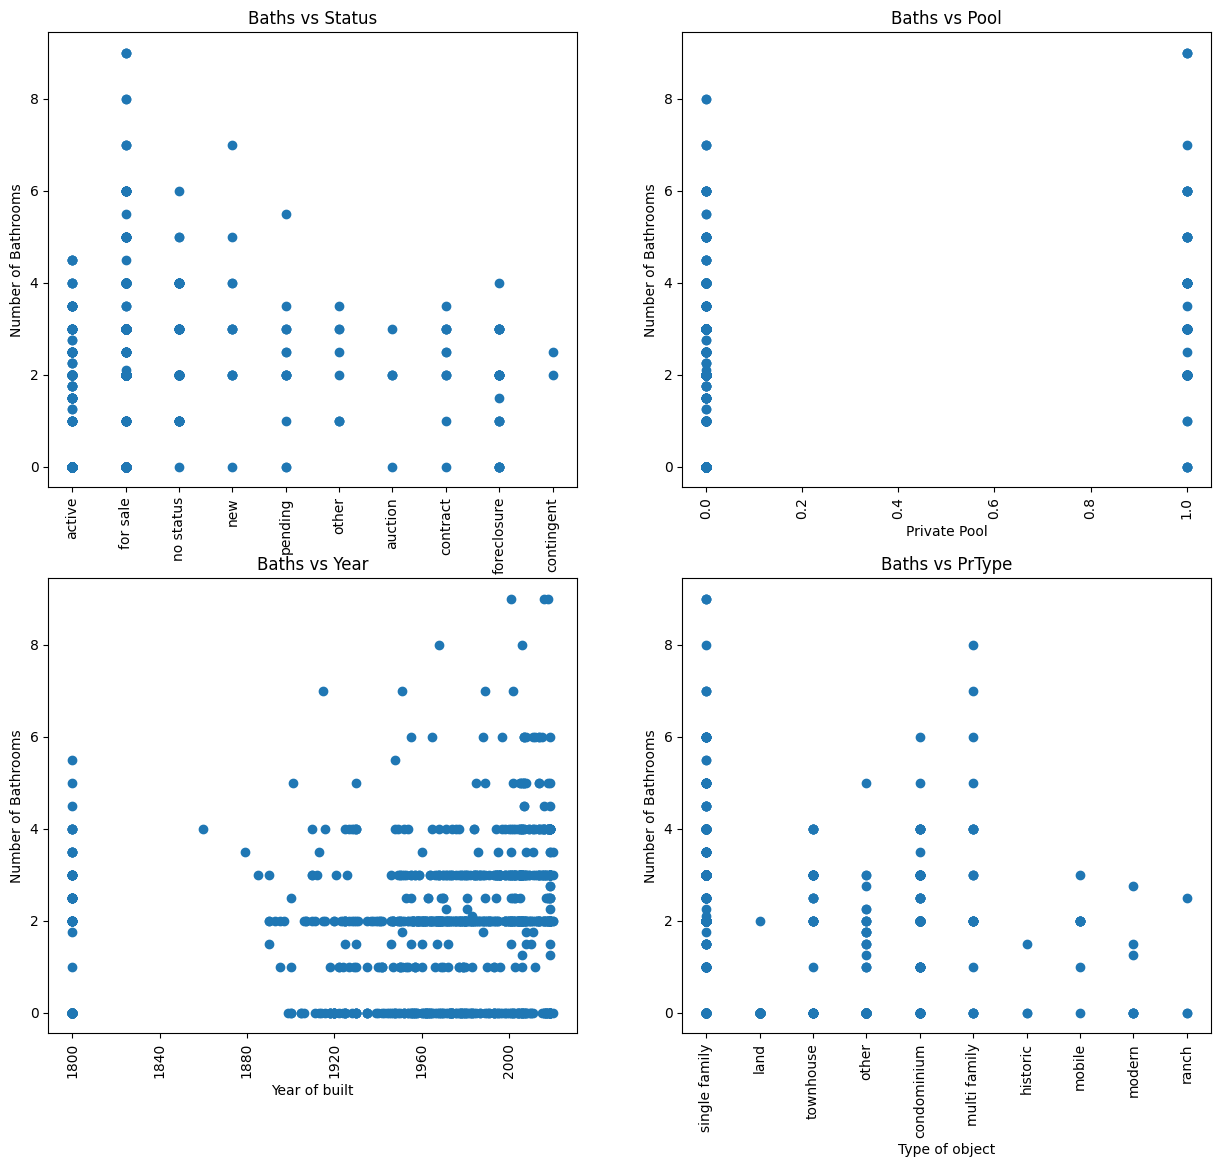

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=small_df['status'], y=small_df['baths'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Number of Bathrooms')
axes[0][0].set_title('Baths vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=small_df['PoolPrivate'], y=small_df['baths'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Number of Bathrooms')
axes[0][1].set_title('Baths vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=small_df['Year built'], y=small_df['baths'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Number of Bathrooms')
axes[1][0].set_title('Baths vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=small_df['PrType'], y=small_df['baths'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Number of Bathrooms')
axes[1][1].set_title('Baths vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

In [ ]:
fig = px.scatter_geo(small_df, lat = 'latitude', lon = 'longitude', color = 'baths')
fig.update_layout(title = 'Baths on map', title_x = 0.5)
fig.show()

Выводы.  

_____________

##### Beds - спальни

Text(0, 0.5, 'frequency')

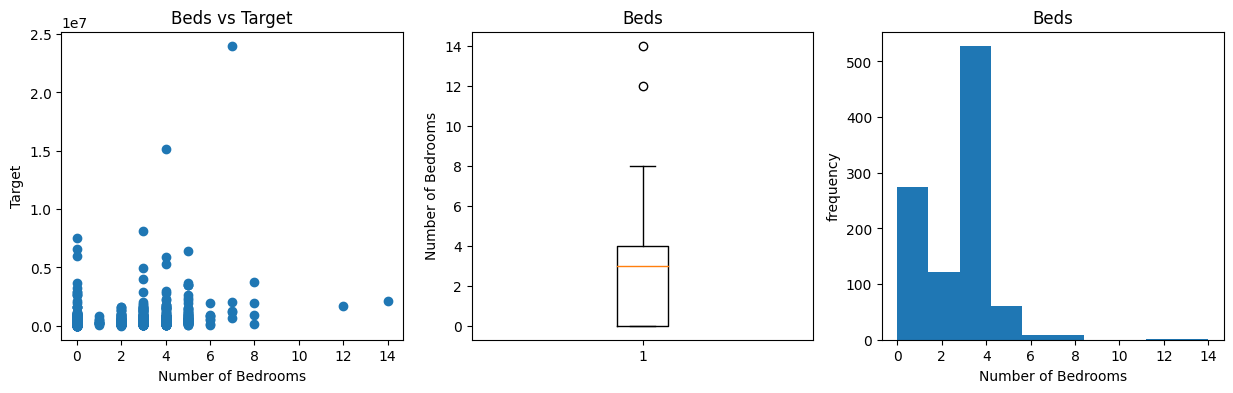

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=small_df['beds'], y=small_df['target'])
ax1.set_xlabel('Number of Bedrooms')
ax1.set_ylabel('Target')
ax1.set_title('Beds vs Target')

ax2.boxplot(small_df['beds'])
ax2.set_ylabel('Number of Bedrooms')
ax2.set_title('Beds')

ax3.hist(small_df['beds'])
ax3.set_title('Beds')
ax3.set_xlabel('Number of Bedrooms')
ax3.set_ylabel('frequency')

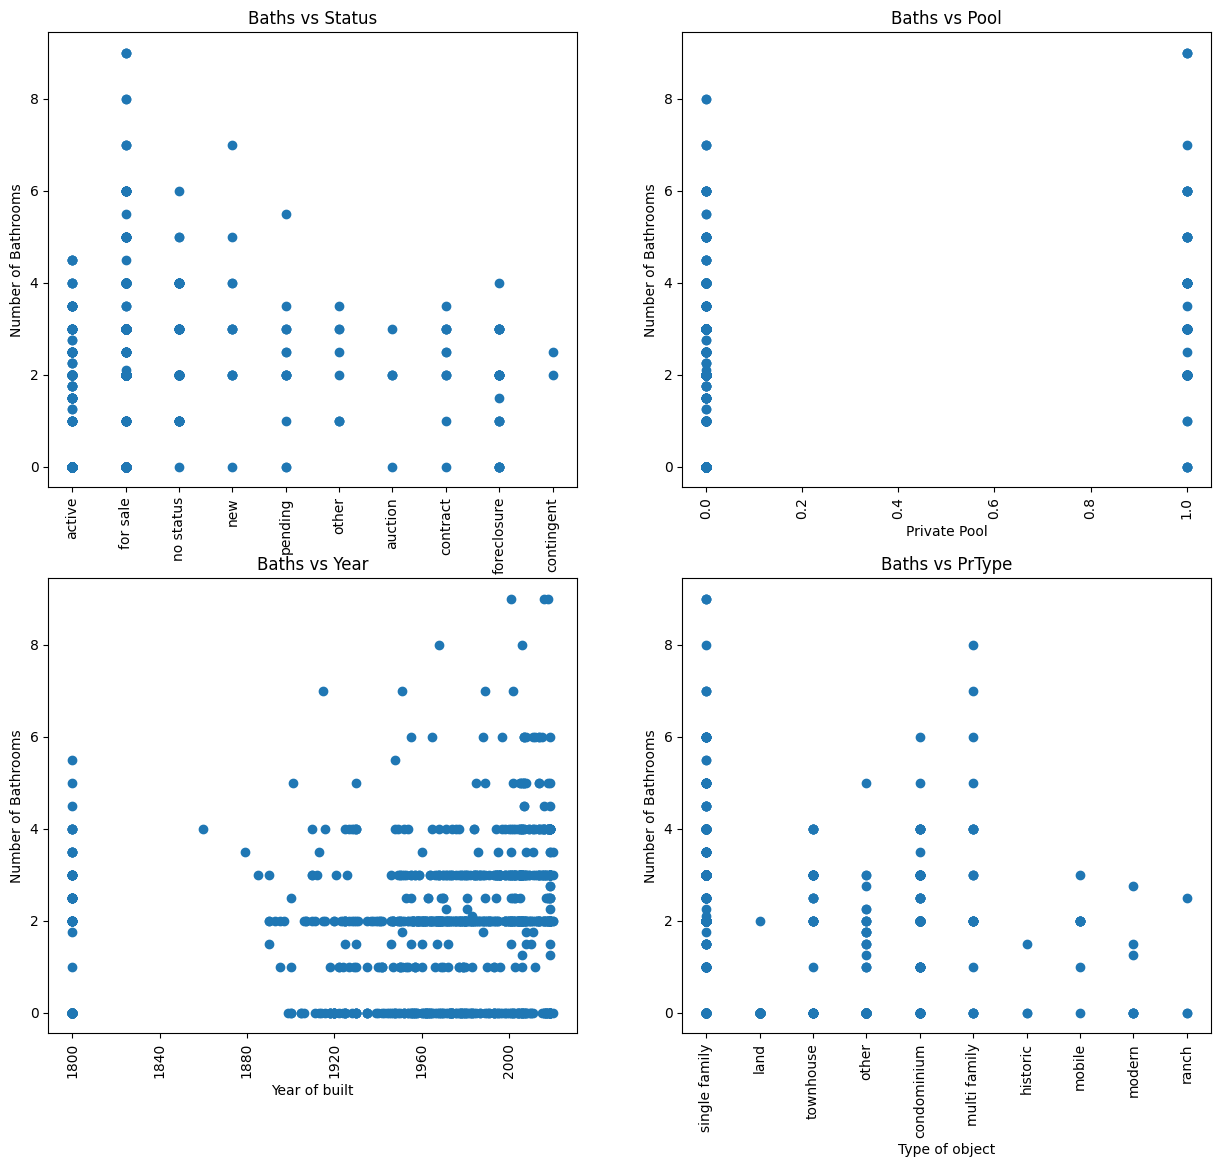

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=small_df['status'], y=small_df['baths'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Number of Bathrooms')
axes[0][0].set_title('Baths vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=small_df['PoolPrivate'], y=small_df['baths'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Number of Bathrooms')
axes[0][1].set_title('Baths vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=small_df['Year built'], y=small_df['baths'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Number of Bathrooms')
axes[1][0].set_title('Baths vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=small_df['PrType'], y=small_df['baths'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Number of Bathrooms')
axes[1][1].set_title('Baths vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

In [ ]:
fig = px.scatter_geo(small_df, lat = 'latitude', lon = 'longitude', color = 'baths')
fig.update_layout(title = 'Baths on map', title_x = 0.5)
fig.show()

Выводы.  

_____________

##### Target - цена объекта

Text(0, 0.5, 'frequency')

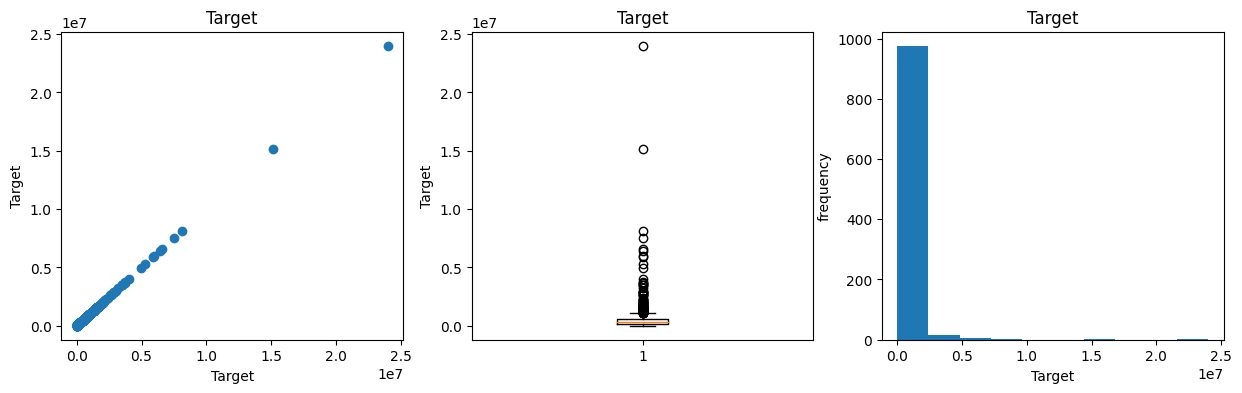

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=small_df['target'], y=small_df['target'])
ax1.set_xlabel('Target')
ax1.set_ylabel('Target')
ax1.set_title('Target')

ax2.boxplot(small_df['target'])
ax2.set_ylabel('Target')
ax2.set_title('Target')

ax3.hist(small_df['target'])
ax3.set_title('Target')
ax3.set_xlabel('Target')
ax3.set_ylabel('frequency')

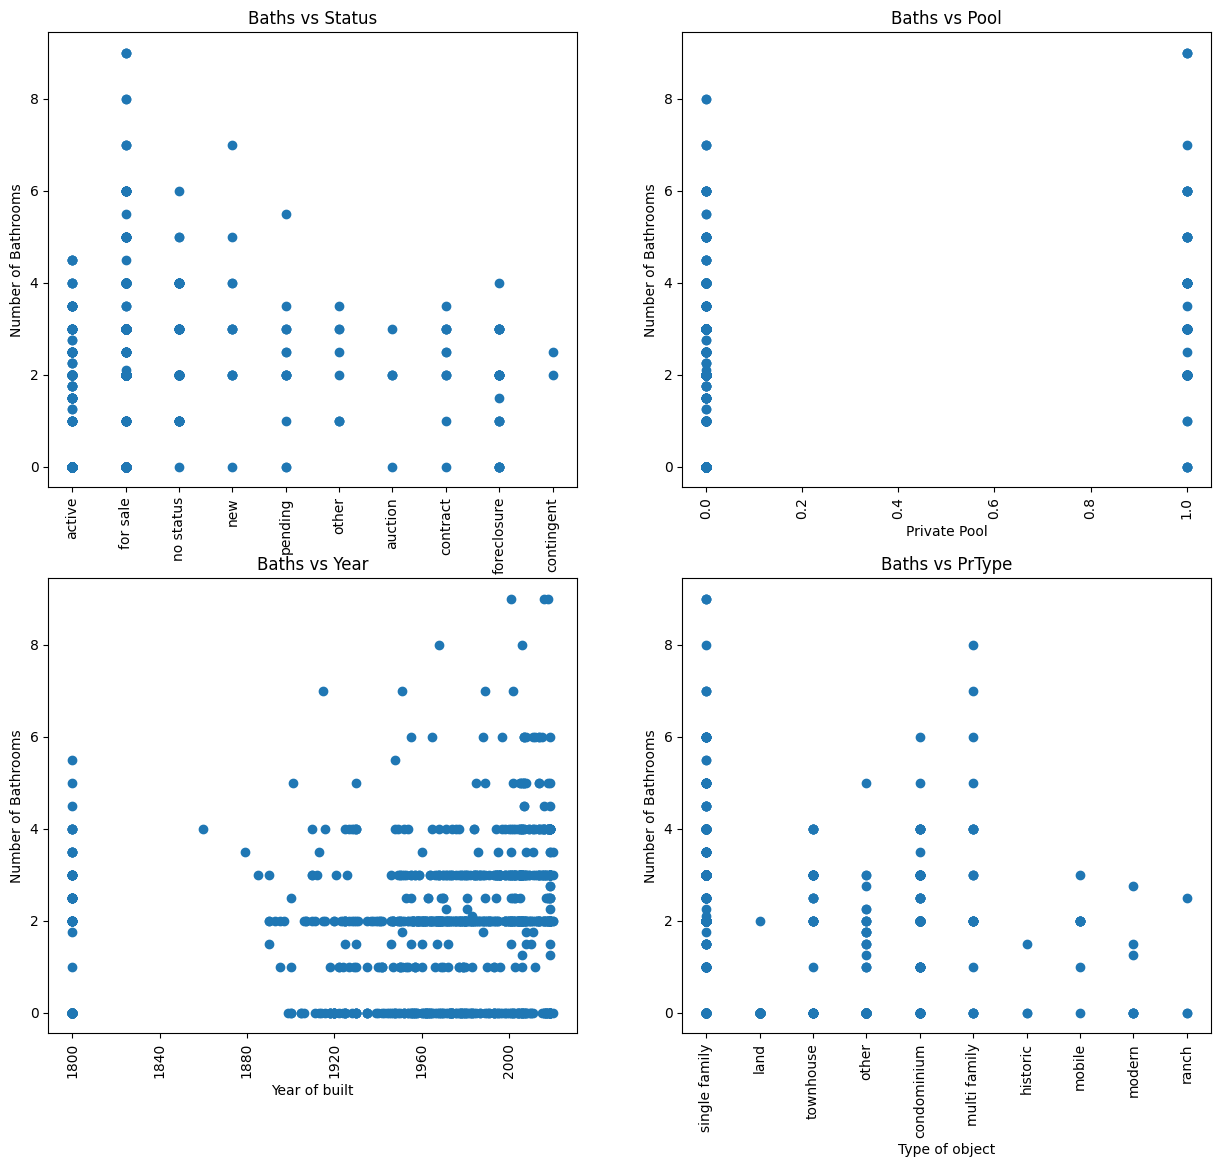

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=small_df['status'], y=small_df['baths'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Number of Bathrooms')
axes[0][0].set_title('Baths vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=small_df['PoolPrivate'], y=small_df['baths'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Number of Bathrooms')
axes[0][1].set_title('Baths vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=small_df['Year built'], y=small_df['baths'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Number of Bathrooms')
axes[1][0].set_title('Baths vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=small_df['PrType'], y=small_df['baths'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Number of Bathrooms')
axes[1][1].set_title('Baths vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

In [ ]:
fig = px.scatter_geo(small_df, lat = 'latitude', lon = 'longitude', color = 'baths')
fig.update_layout(title = 'Baths on map', title_x = 0.5)
fig.show()

Выводы.  

_____________

##### Lotsize - размер участка

Text(0, 0.5, 'frequency')

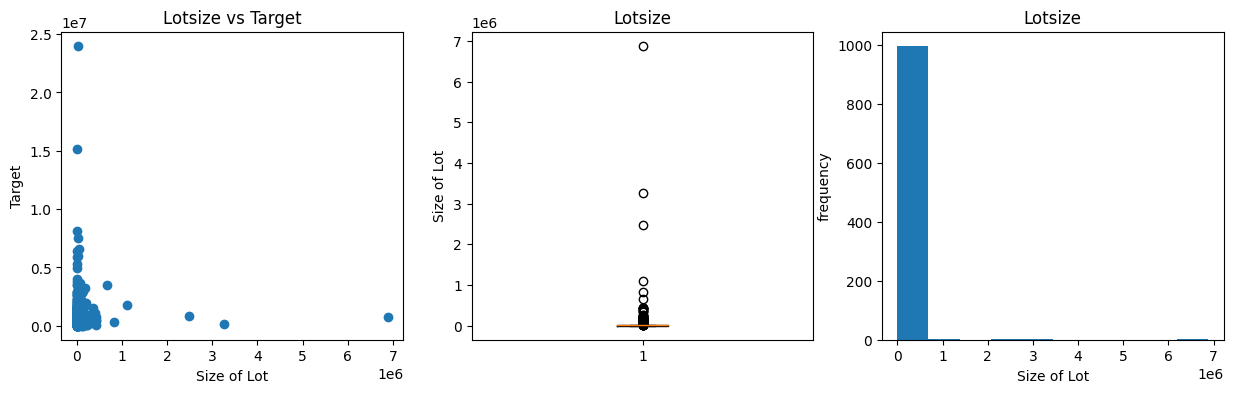

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=small_df['lotsize'], y=small_df['target'])
ax1.set_xlabel('Size of Lot')
ax1.set_ylabel('Target')
ax1.set_title('Lotsize vs Target')

ax2.boxplot(small_df['lotsize'])
ax2.set_ylabel('Size of Lot')
ax2.set_title('Lotsize')

ax3.hist(small_df['lotsize'])
ax3.set_title('Lotsize')
ax3.set_xlabel('Size of Lot')
ax3.set_ylabel('frequency')

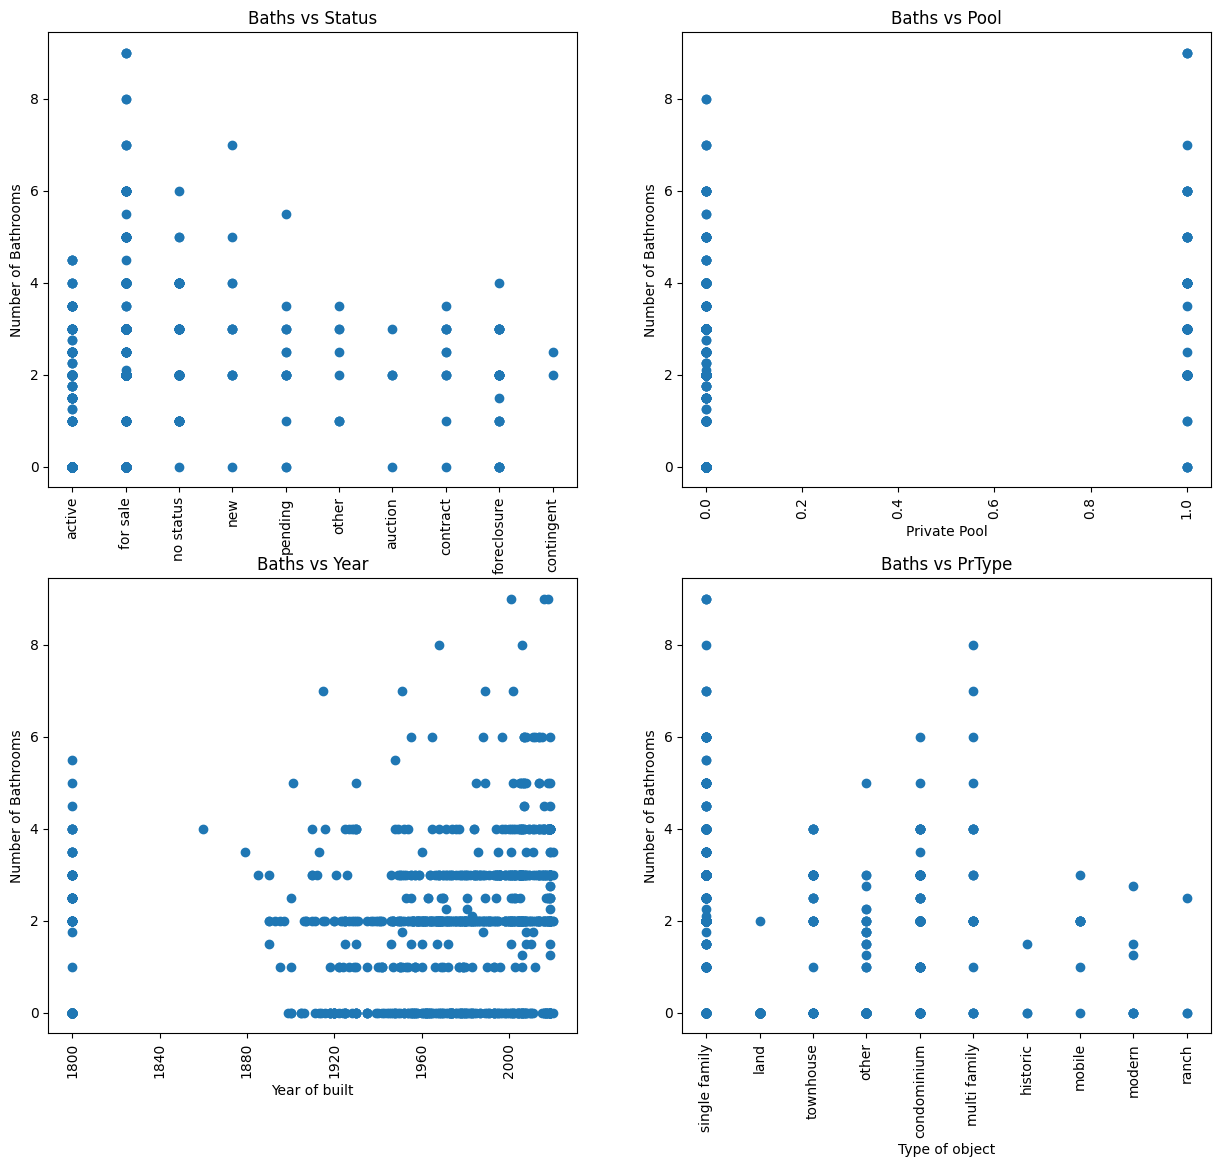

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=small_df['status'], y=small_df['baths'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Number of Bathrooms')
axes[0][0].set_title('Baths vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=small_df['PoolPrivate'], y=small_df['baths'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Number of Bathrooms')
axes[0][1].set_title('Baths vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=small_df['Year built'], y=small_df['baths'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Number of Bathrooms')
axes[1][0].set_title('Baths vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=small_df['PrType'], y=small_df['baths'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Number of Bathrooms')
axes[1][1].set_title('Baths vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

In [ ]:
fig = px.scatter_geo(small_df, lat = 'latitude', lon = 'longitude', color = 'baths')
fig.update_layout(title = 'Baths on map', title_x = 0.5)
fig.show()

Выводы.  

_____________

##### School_rate - средний рейтинг близлежащих школ

Text(0, 0.5, 'frequency')

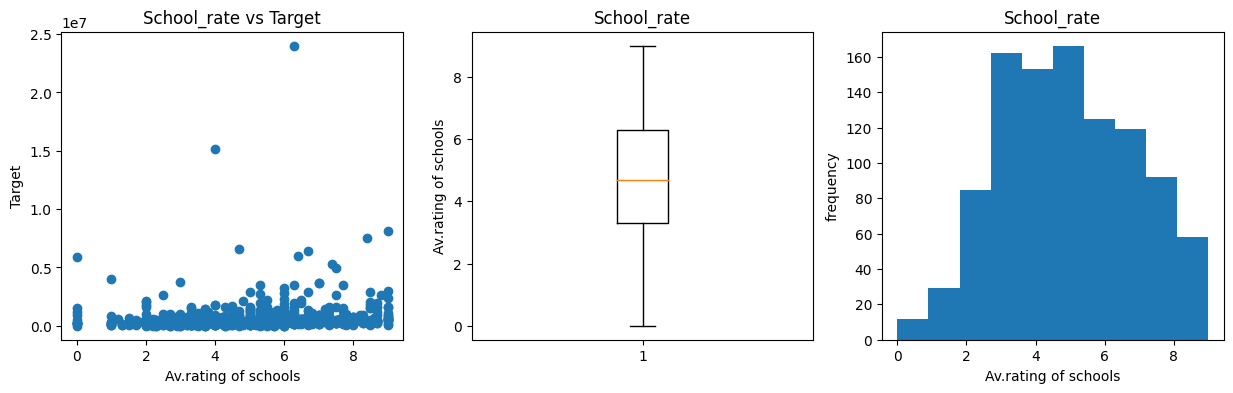

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=small_df['school_rate'], y=small_df['target'])
ax1.set_xlabel('Av.rating of schools')
ax1.set_ylabel('Target')
ax1.set_title('School_rate vs Target')

ax2.boxplot(small_df['school_rate'])
ax2.set_ylabel('Av.rating of schools')
ax2.set_title('School_rate')

ax3.hist(small_df['school_rate'])
ax3.set_title('School_rate')
ax3.set_xlabel('Av.rating of schools')
ax3.set_ylabel('frequency')

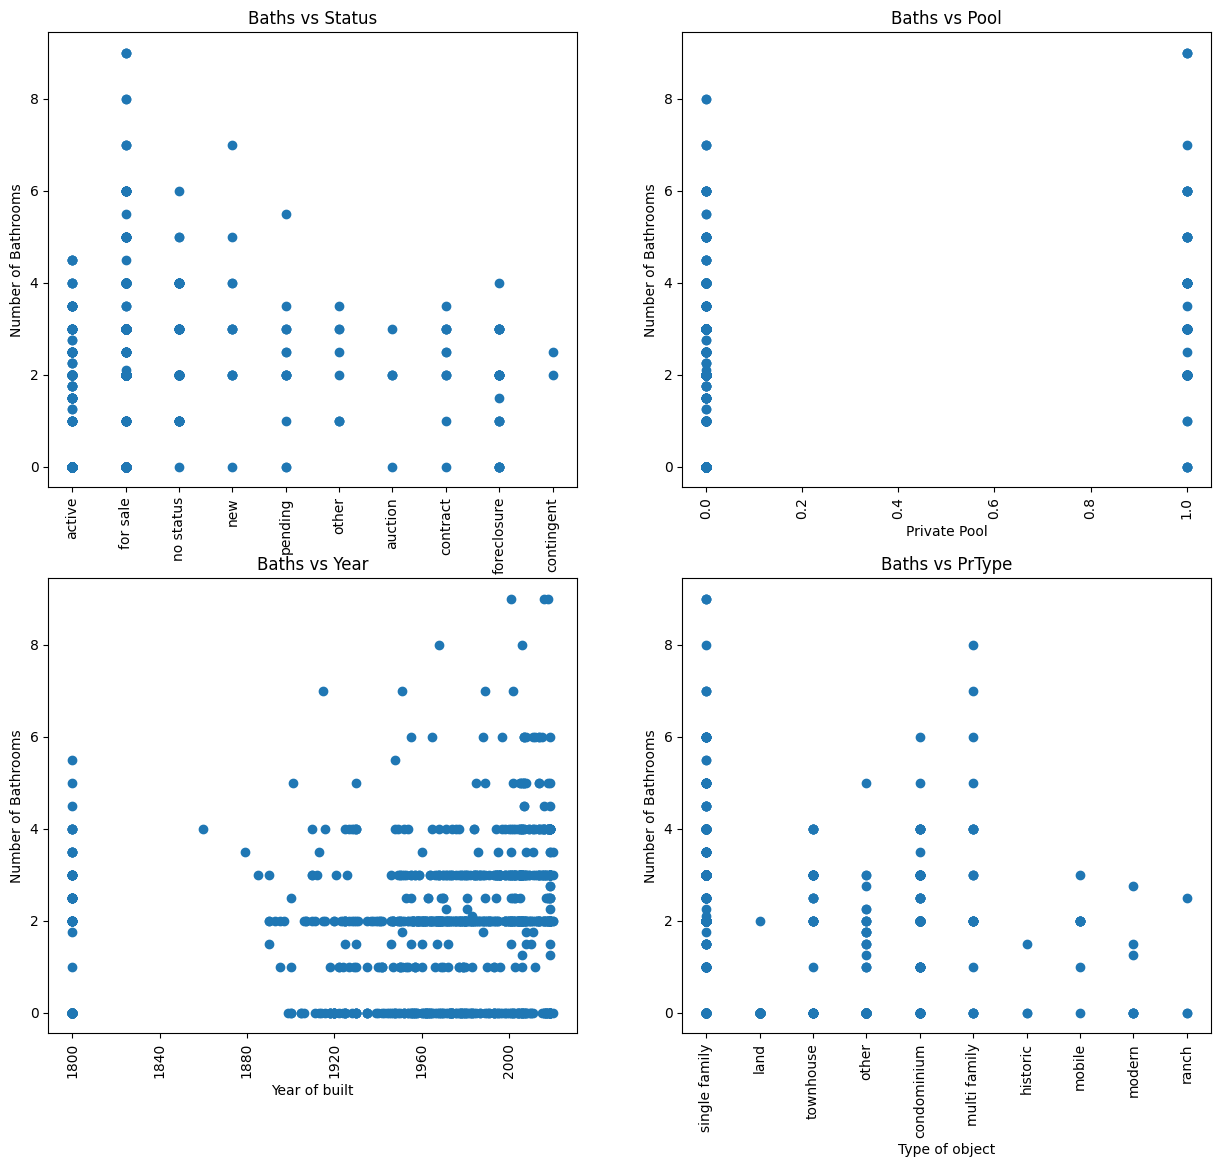

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=small_df['status'], y=small_df['baths'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Number of Bathrooms')
axes[0][0].set_title('Baths vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=small_df['PoolPrivate'], y=small_df['baths'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Number of Bathrooms')
axes[0][1].set_title('Baths vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=small_df['Year built'], y=small_df['baths'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Number of Bathrooms')
axes[1][0].set_title('Baths vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=small_df['PrType'], y=small_df['baths'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Number of Bathrooms')
axes[1][1].set_title('Baths vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

In [ ]:
fig = px.scatter_geo(small_df, lat = 'latitude', lon = 'longitude', color = 'baths')
fig.update_layout(title = 'Baths on map', title_x = 0.5)
fig.show()

Выводы.  

_____________

##### School_dist - расстояние до ближайшей школы

Text(0, 0.5, 'frequency')

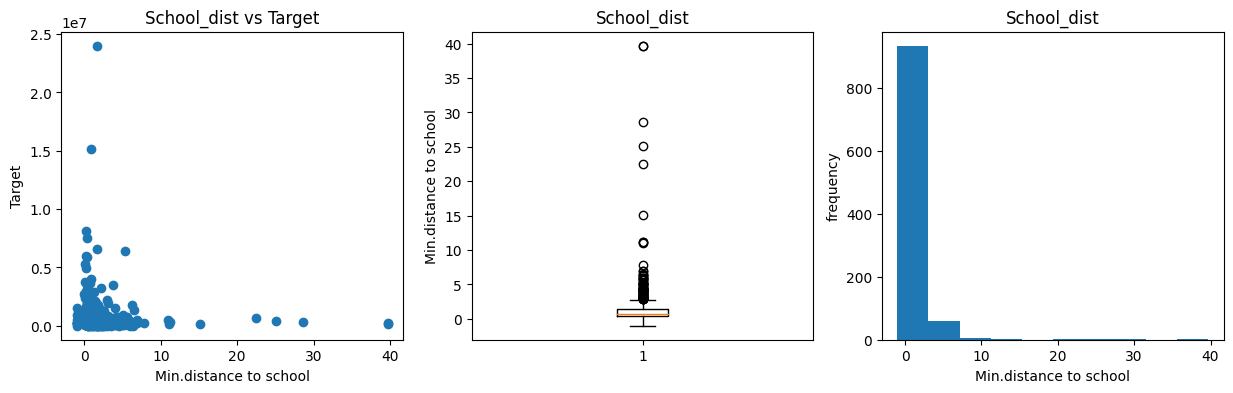

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=small_df['school_dist'], y=small_df['target'])
ax1.set_xlabel('Min.distance to school')
ax1.set_ylabel('Target')
ax1.set_title('School_dist vs Target')

ax2.boxplot(small_df['school_dist'])
ax2.set_ylabel('Min.distance to school')
ax2.set_title('School_dist')

ax3.hist(small_df['school_dist'])
ax3.set_title('School_dist')
ax3.set_xlabel('Min.distance to school')
ax3.set_ylabel('frequency')

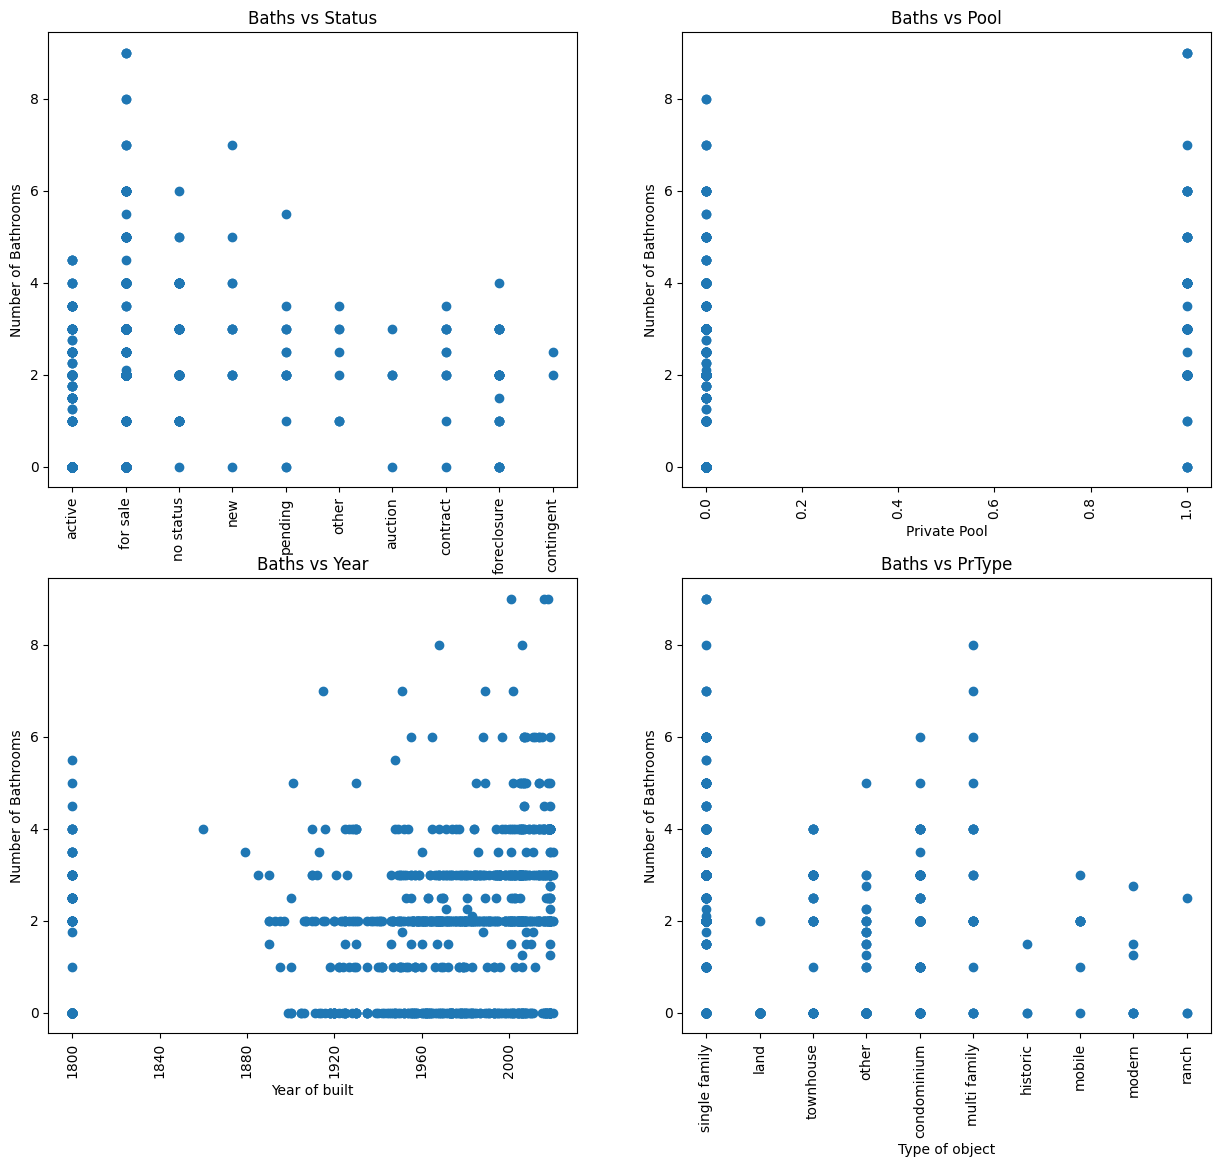

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=small_df['status'], y=small_df['baths'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Number of Bathrooms')
axes[0][0].set_title('Baths vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=small_df['PoolPrivate'], y=small_df['baths'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Number of Bathrooms')
axes[0][1].set_title('Baths vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=small_df['Year built'], y=small_df['baths'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Number of Bathrooms')
axes[1][0].set_title('Baths vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=small_df['PrType'], y=small_df['baths'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Number of Bathrooms')
axes[1][1].set_title('Baths vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

In [ ]:
fig = px.scatter_geo(small_df, lat = 'latitude', lon = 'longitude', color = 'baths')
fig.update_layout(title = 'Baths on map', title_x = 0.5)
fig.show()

Выводы.  

_____________